Air quality index (AQI) analysis is a crucial aspect of environment that involves monitoring and analyzing air quality in a specific location. It aims to provide a numerical value representative of overall air quality, essential for public health and environmental management

# Air Quality Index Analysis: Process We Can Follow

Air Quality Index Analysis aims to provide a numerical value representative of overall air quality, essential for public health and environmental management. Below are the steps we can follow for the task of Air Quality Index Analysis:

1.Gathered air quality data from various sources, such as government monitoring stations, sensors, or satellite imagery.
2.Clean and preprocess the collected data.
3.Calculate the Air Quality Index using standardized formulas and guidelines provided by environmental agencies.
4.Create visualizations, such as line charts or heatmaps, to represent the AQI over time or across geographical regions.
5.Compare the AQI metrics of the location with the recommended air quality metrics.

In [20]:
#Importing all the libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
pio.templates.default = "plotly_white"

In [2]:
# reading the dataset
df = pd.read_csv("delhiaqi.csv")

In [3]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83
1,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66
2,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40
3,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55
4,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19


In [4]:
df.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
556,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
557,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
558,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
559,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
560,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [5]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,3814.942210,51.181979,75.292496,30.141943,64.655936,358.256364,420.988414,26.425062
std,3227.744681,83.904476,42.473791,39.979405,61.073080,227.359117,271.287026,36.563094
min,654.220000,0.000000,13.370000,0.000000,5.250000,60.100000,69.080000,0.630000
25%,1708.980000,3.380000,44.550000,0.070000,28.130000,204.450000,240.900000,8.230000
50%,2590.180000,13.300000,63.750000,11.800000,47.210000,301.170000,340.900000,14.820000
75%,4432.680000,59.010000,97.330000,47.210000,77.250000,416.650000,482.570000,26.350000
max,16876.220000,425.580000,263.210000,164.510000,511.170000,1310.200000,1499.270000,267.510000


In [7]:
df.isnull().sum()

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64

Calculating AQI

In [9]:
import pandas as pd

# Assuming 'df' is your DataFrame with pollutant concentrations
# Make sure to replace the placeholder values with the actual concentration columns in your dataset

# Function to calculate AQI for PM2.5
def calculate_pm25_aqi(concentration):
    breakpoints = [0, 12.0, 35.4, 55.4, 150.4, 250.4, 350.4, 500.4]
    categories = [0, 50, 100, 150, 200, 300, 400, 500]

    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= concentration <= breakpoints[i + 1]:
            aqi = ((categories[i + 1] - categories[i]) / (breakpoints[i + 1] - breakpoints[i])) * (concentration - breakpoints[i]) + categories[i]
            return round(aqi)

    return 500  # Cap the AQI at 500 if concentration is above the highest breakpoint

# Function to calculate AQI for PM10 (similar to PM2.5, adapt based on specific guidelines)
def calculate_pm10_aqi(concentration):
    breakpoints = [0, 54, 154, 254, 354, 424, 504, 604]
    categories = [0, 50, 100, 150, 200, 300, 400, 500]

    for i in range(len(breakpoints) - 1):
        if breakpoints[i] <= concentration <= breakpoints[i + 1]:
            aqi = ((categories[i + 1] - categories[i]) / (breakpoints[i + 1] - breakpoints[i])) * (concentration - breakpoints[i]) + categories[i]
            return round(aqi)

    return 500  # Cap the AQI at 500 if concentration is above the highest breakpoint

# Apply AQI calculation functions to your DataFrame
df['PM2.5_AQI'] = df['pm2_5'].apply(calculate_pm25_aqi)
df['PM10_AQI'] = df['pm10'].apply(calculate_pm10_aqi)

# Calculate overall AQI based on the maximum sub-index among pollutants
df['Overall_AQI'] = df[['PM2.5_AQI', 'PM10_AQI']].max(axis=1)

# Print or visualize the DataFrame with calculated AQI values
print(df[['date', 'pm2_5', 'PM2.5_AQI', 'pm10', 'PM10_AQI', 'Overall_AQI']])


                    date   pm2_5  PM2.5_AQI    pm10  PM10_AQI  Overall_AQI
0    2023-01-01 00:00:00  169.29        219  194.64       120          219
1    2023-01-01 01:00:00  182.84        232  211.08       129          232
2    2023-01-01 02:00:00  220.25        270  260.68       153          270
3    2023-01-01 03:00:00  252.90        302  304.12       175          302
4    2023-01-01 04:00:00  266.36        316  322.80       184          316
..                   ...     ...        ...     ...       ...          ...
556  2023-01-24 04:00:00  231.15        281  289.84       168          281
557  2023-01-24 05:00:00  225.08        275  280.52       163          275
558  2023-01-24 06:00:00  242.49        292  296.07       171          292
559  2023-01-24 07:00:00  165.67        215  191.82       119          215
560  2023-01-24 08:00:00  123.76        186  140.26        93          186

[561 rows x 6 columns]


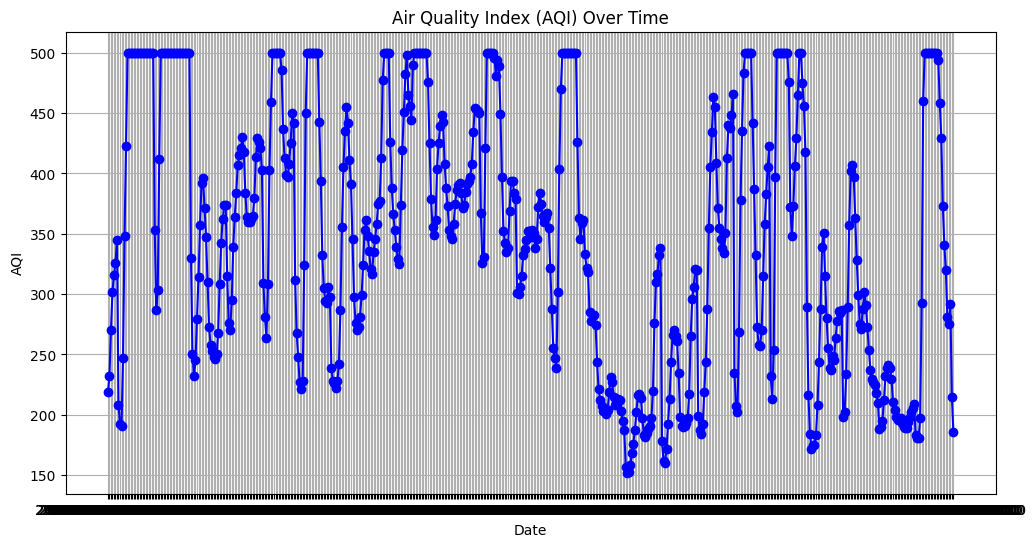

In [21]:
# Linechart for Air Quality Index (AQI) Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Overall_AQI'], marker='o', linestyle='-', color='b')
plt.title('Air Quality Index (AQI) Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()

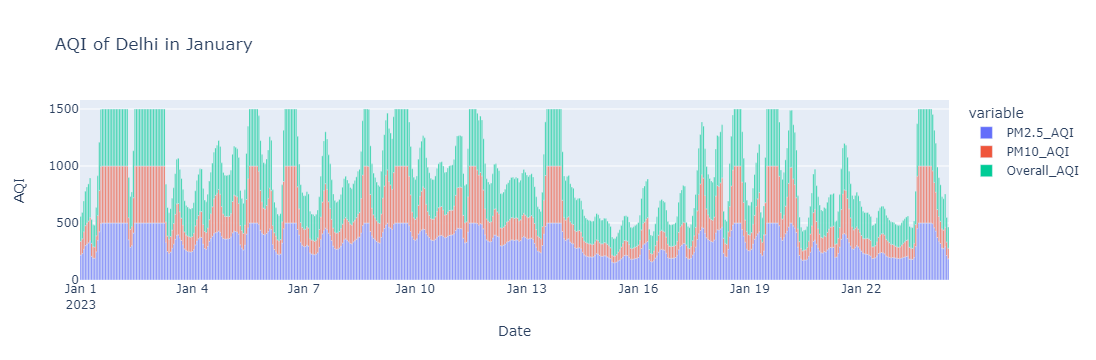

In [17]:
# AQI of Delhi in January
fig = px.bar(df, x="date", y=['PM2.5_AQI', 'PM10_AQI', 'Overall_AQI'], 
             title="AQI of Delhi in January")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="AQI")
fig.show()

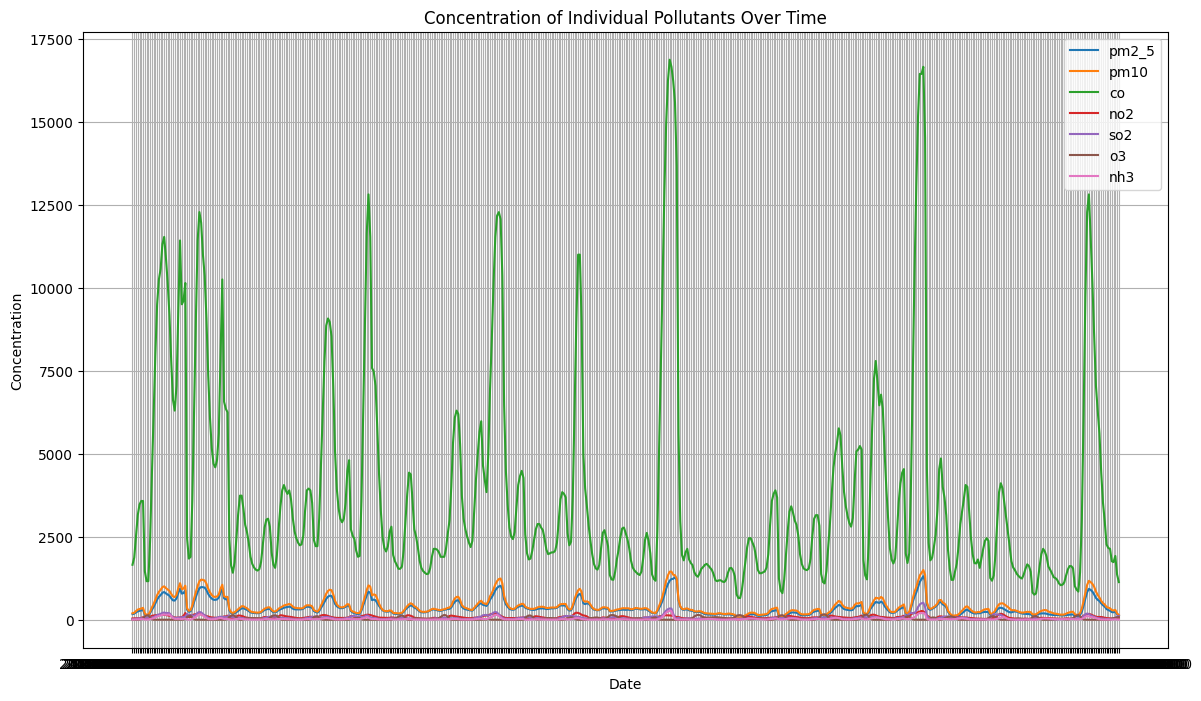

In [22]:
# Line charts for individual pollutants over time
pollutants = ['pm2_5', 'pm10', 'co', 'no2', 'so2', 'o3', 'nh3']

plt.figure(figsize=(14, 8))
for pollutant in pollutants:
    plt.plot(df['date'], df[pollutant], label=pollutant)

plt.title('Concentration of Individual Pollutants Over Time')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.grid(True)
plt.show()


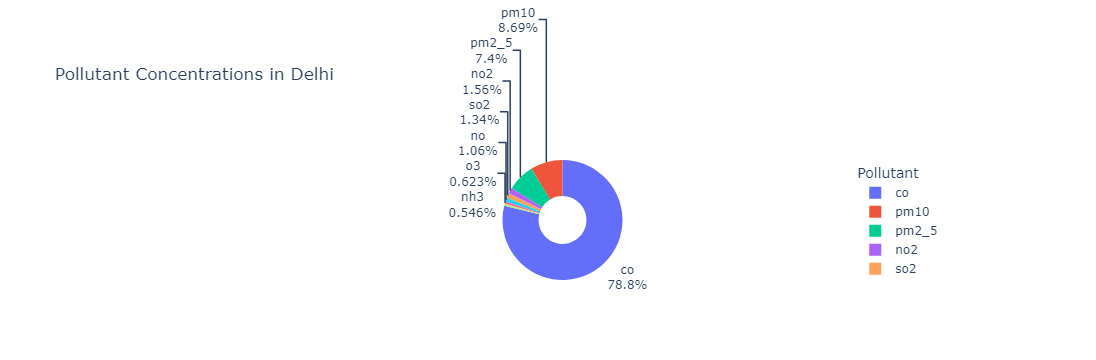

In [31]:
# Define pollutants and their colors
pollutants = ["co", "no", "no2", "o3", "so2", "pm2_5", "pm10", "nh3"]
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = df[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_df = pd.DataFrame({
    "Pollutant": pollutants,
    "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_df, names="Pollutant", values="Concentration",
             title="Pollutant Concentrations in Delhi",
             hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="Pollutant")

# Show the donut plot
fig.show()

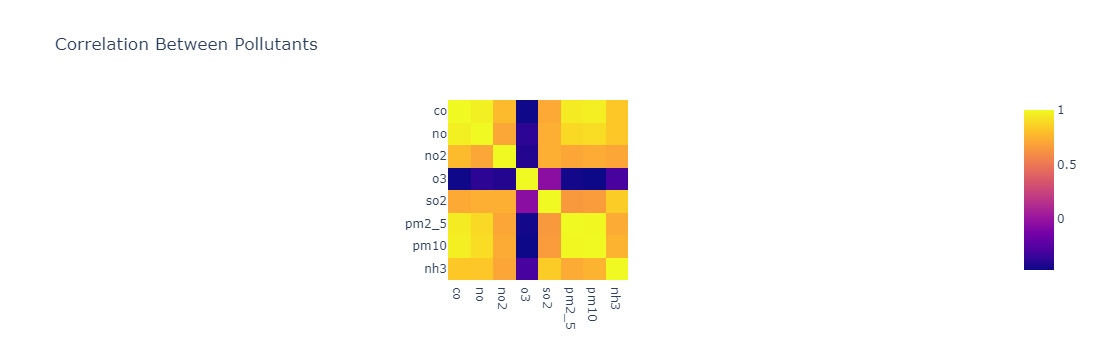

In [32]:
# Correlation Between Pollutants
correlation_matrix = df[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants, 
                 y=pollutants, title="Correlation Between Pollutants")
fig.show()

In [38]:
# Define AQI breakpoints and corresponding AQI values
aqi_breakpoints = [
    (0, 12.0, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
    (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 350.4, 400),
    (350.5, 500.4, 500)
]

def calculate_aqi(pollutant_name, concentration):
    for low, high, aqi in aqi_breakpoints:
        if low <= concentration <= high:
            return aqi
    return None

def calculate_overall_aqi(row):
    aqi_values = []
    pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
    for pollutant in pollutants:
        aqi = calculate_aqi(pollutant, row[pollutant])
        if aqi is not None:
            aqi_values.append(aqi)
    return max(aqi_values)

# Calculate AQI for each row
df['AQI'] = df.apply(calculate_overall_aqi, axis=1)

# Define AQI categories
aqi_categories = [
    (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
    (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
]

def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

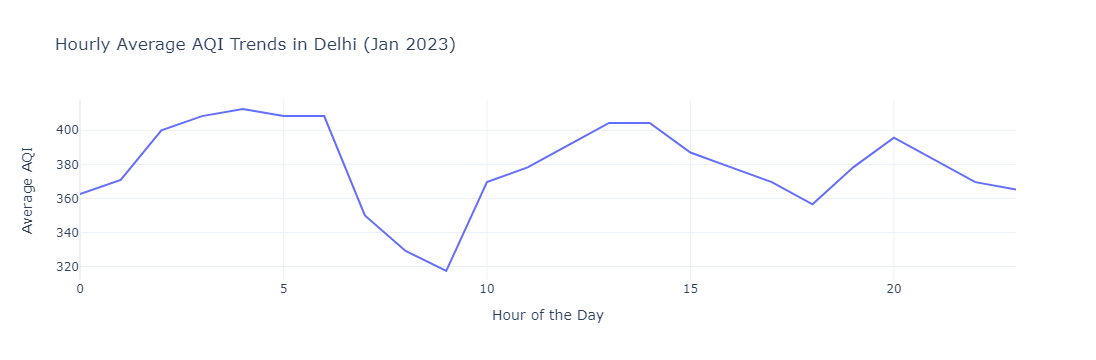

In [39]:
# Extract the hour from the date
df['Hour'] = pd.to_datetime(df['date']).dt.hour

# Calculate hourly average AQI
hourly_avg_aqi = df.groupby('Hour')['AQI'].mean().reset_index()

# Create a line plot for hourly trends in AQI
fig = px.line(hourly_avg_aqi, x='Hour', y='AQI', 
              title='Hourly Average AQI Trends in Delhi (Jan 2023)')
fig.update_xaxes(title="Hour of the Day")
fig.update_yaxes(title="Average AQI")
fig.show()

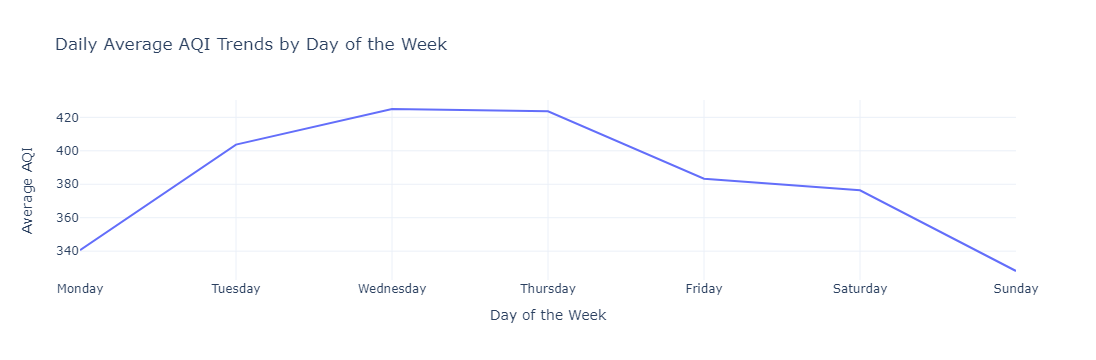

In [44]:
# Daily Average AQI Trends by Day of The week

# Assuming 'data' is your DataFrame with hourly data
# If 'date' is not already in datetime format, convert it
df['date'] = pd.to_datetime(df['date'])

# Extract day of the week for daily aggregation
df['DayOfWeek'] = df['date'].dt.day_name()

# Calculate daily average AQI
daily_avg_aqi = df.groupby('DayOfWeek')['AQI'].mean().reset_index()

# Order the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_avg_aqi['DayOfWeek'] = pd.Categorical(daily_avg_aqi['DayOfWeek'], categories=days_order, ordered=True)
daily_avg_aqi = daily_avg_aqi.sort_values('DayOfWeek')

# Create a line plot for daily trends in AQI
fig = px.line(daily_avg_aqi, x='DayOfWeek', y='AQI',
              title='Daily Average AQI Trends by Day of the Week',
              labels={'AQI': 'Average AQI', 'DayOfWeek': 'Day of the Week'})
fig.show()


It shows that the air quality in Delhi is worse on Wednesdays and Thursdays. 

# Summary

Air quality index (AQI) analysis is a crucial aspect of environment that involves monitoring and analyzing air quality in a specific location. It aims to provide a numerical value representative of overall air quality, essential for public health and environmental management.